## Lab 3.4: csvs, functions, numpy, and distributions

Run the cell below to load the required packages and set up plotting in the notebook!

In [22]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import seaborn as sns
%matplotlib inline

### Sales data

For this lab we will be using a truncated version of some sales data that we will be looking at further down the line in more detail. 

The csv has about 200 rows of data and 4 columns. The relative path to the csv ```sales_info.csv``` is provided below. If you copied files over and moved them around, this might be different for you and you will have to figure out the correct relative path to enter.

In [23]:
sales_csv_path = '../../assets/datasets/sales_info.csv'

#### 1. Loading the data

Set up an empty list called ```rows```.

Using the pattern for loading csvs we learned earlier, add all of the rows in the csv file to the rows list.

For your reference, the pattern is:
```python
with open(my_csv_path, 'r') as f:
    reader = csv.reader(f)
    ...
```

Beyond this, adding the rows in the csv file to the ```rows``` variable is up to you.

In [24]:
rows = pd.read_csv('assets/datasets/sales_info.csv')
type(rows)
rows.head(3)

,volume_sold,2015_margin,2015_q1_sales,2016_q1_sales
0,18.420760,93.802281,337166.53,337804.05
1,4.776510,21.082425,22351.86,21736.63
2,16.602401,93.612494,277764.46,306942.27


##### 2. Separate header and data

The header of the csv is contained in the first index of the ```rows``` variable, as it is the first row in the csv file. 

Use python indexing to create two new variables: ```header``` which contains the 4 column names, and ```data``` which contains the list of lists, each sub-list representing a row from the csv.

Lastly, print ```header``` to see the names of the columns.

In [25]:
header=rows.head(0)
header
rows.head()

,volume_sold,2015_margin,2015_q1_sales,2016_q1_sales
0,18.420760,93.802281,337166.53,337804.05
1,4.776510,21.082425,22351.86,21736.63
2,16.602401,93.612494,277764.46,306942.27
3,4.296111,16.824704,16805.11,9307.75
4,8.156023,35.011457,54411.42,58939.90


In [30]:
rows.head(0)

,volume_sold,2015_margin,2015_q1_sales,2016_q1_sales


In [27]:
rows.columns



Index([u'volume_sold', u'2015_margin', u'2015_q1_sales', u'2016_q1_sales'], dtype='object')

In [32]:
col = rows.columns.tolist()
col

['volume_sold', '2015_margin', '2015_q1_sales', '2016_q1_sales']

In [28]:
rows.loc[0]

volume_sold          18.420760
2015_margin          93.802281
2015_q1_sales    337166.530000
2016_q1_sales    337804.050000
Name: 0, dtype: float64

In [14]:
rows.dtypes

volume_sold      float64
2015_margin      float64
2015_q1_sales    float64
2016_q1_sales    float64
dtype: object

In [37]:
len(rows)

200

In [64]:
rows.dtypes

volume_sold      float64
2015_margin      float64
2015_q1_sales    float64
2016_q1_sales    float64
dtype: object

In [65]:
rows.index

RangeIndex(start=0, stop=200, step=1)

In [59]:
new = rows.head()
rows.loc[1]



volume_sold          4.776510
2015_margin         21.082425
2015_q1_sales    22351.860000
2016_q1_sales    21736.630000
Name: 1, dtype: float64

In [94]:
rows.mean()


volume_sold          10.018684
2015_margin          46.858895
2015_q1_sales    154631.668200
2016_q1_sales    154699.178750
dtype: float64

In [95]:
rows.median()

volume_sold           8.166346
2015_margin          36.562144
2015_q1_sales    104199.410000
2016_q1_sales    103207.200000
dtype: float64

In [96]:
rows.mode()

,volume_sold,2015_margin,2015_q1_sales,2016_q1_sales


#### 3. Create a dictionary with the data

Use loops or list comprehensions to create a dictionary called ```sales_data```, where the keys of the dictionary are the column names, and the values of the dictionary are lists of the data points of the column corresponding to that column name.

**3.A** Print out the first 10 items of the 'volume_sold' column.

In [16]:
rows['volume_sold'][0:10]

0    18.420760
1     4.776510
2    16.602401
3     4.296111
4     8.156023
5     5.005122
6    14.606750
7     4.456466
8     5.047530
9     5.388070
Name: volume_sold, dtype: float64

#### 4. Convert data from string to float

As you can see, the data is still in string format (which is how it is read in from the csv). For each key:value pair in our ```sales_data``` dictionary, convert the values (column data) from string values to float values.

In [71]:
rows["volume_sold"]

0      18.420760
1       4.776510
2      16.602401
3       4.296111
4       8.156023
5       5.005122
6      14.606750
7       4.456466
8       5.047530
9       5.388070
10      9.347349
11     10.930398
12      6.270209
13     12.395919
14      4.557712
15      4.200122
16     10.252870
17     12.076785
18      3.725095
19      3.210727
20      6.290971
21      7.434821
22      4.376225
23     12.988913
24     11.697456
25      5.965175
26      3.945223
27      7.369585
28      7.343509
29     12.350027
         ...    
170     8.443932
171     5.151964
172     6.537069
173     8.500445
174     3.931543
175     6.163689
176     4.904447
177     7.402413
178    47.503269
179    55.739180
180    11.840780
181     7.002294
182     8.753142
183     3.147741
184     7.196779
185    76.203692
186    10.804337
187    10.705327
188    51.800686
189     5.882779
190     6.686406
191     5.833355
192    45.556096
193     5.172606
194    10.118018
195    51.675537
196     2.794631
197     7.6116

#### 5. Write function to print summary statistics

Now write a function to print out summary statistics for the data.

Your function should:

- Accept two arguments: the column name and the data associated with that column
- Print out information, clearly labeling each item when you print it:
    1. Print out the column name
    2. Print the mean of the data using ```np.mean()```
    3. Print out the median of the data using ```np.median()```
    4. Print out the mode of the **rounded data** using ```stats.mode()```
    5. Print out the variance of the data using ```np.var()```
    6. Print out the standard deviation of the data using ```np.std()```
    
Remember that you will need to convert the numeric data from these function to strings by wrapping them in the ```str()``` function.

In [91]:
def sumstat(columnname, data):
    print('column name is:'+columnname)
    print('mean is :'+ str(data.mean()))
    print('median is :'+ str(data.median()))
    print('variance is :'+ str(data.var()))
    print('stdev is :'+ str(data.std()))

**5.A** Using your function, print the summary statistics for 'volume_sold'

col is a list with the column names

In [92]:
sumstat(col[0],rows['volume_sold'])

column name is:volume_sold
mean is :10.018684079
median is :8.16634551564
variance is :84.5527288447
stdev is :9.19525577919


**5.B** Using your function, print the summary statistics for '2015_margin'

In [97]:
sumstat(col[0],rows['2015_margin'])

column name is:volume_sold
mean is :46.8588951379
median is :36.5621438181
variance is :2026.19262609
stdev is :45.0132494505


**5.C** Using your function, print the summary statistics for '2015_q1_sales'

In [98]:
sumstat(col[0],rows['2015_q1_sales'])

column name is:volume_sold
mean is :154631.6682
median is :104199.41
variance is :47668644685.8
stdev is :218331.501817


**5.D** Using your function, print the summary statistics for '2016_q1_sales'

In [99]:
sumstat(col[0],rows['2016_q1_sales'])

column name is:volume_sold
mean is :154699.17875
median is :103207.2
variance is :47376293119.0
stdev is :217660.959106


#### 6. Plot the distributions

We've provided a plotting function below called ```distribution_plotter()```. It takes two arguments, the name of the column and the data associated with that column.

In individual cells, plot the distributions for each of the 4 columns. Do the data appear skewed? Symmetrical? If skewed, what would be your hypothesis for why?

In [101]:
def distribution_plotter(column, data):
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set_style("white")
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    dist.set_title('Distribution of ' + column + '\n', fontsize=16)

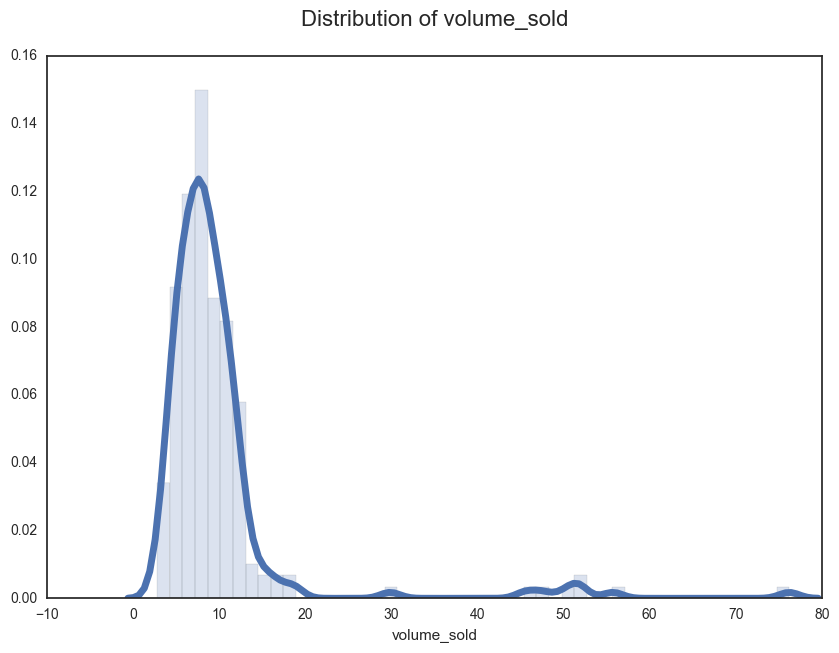

In [102]:
distribution_plotter(col[0],rows['volume_sold'])

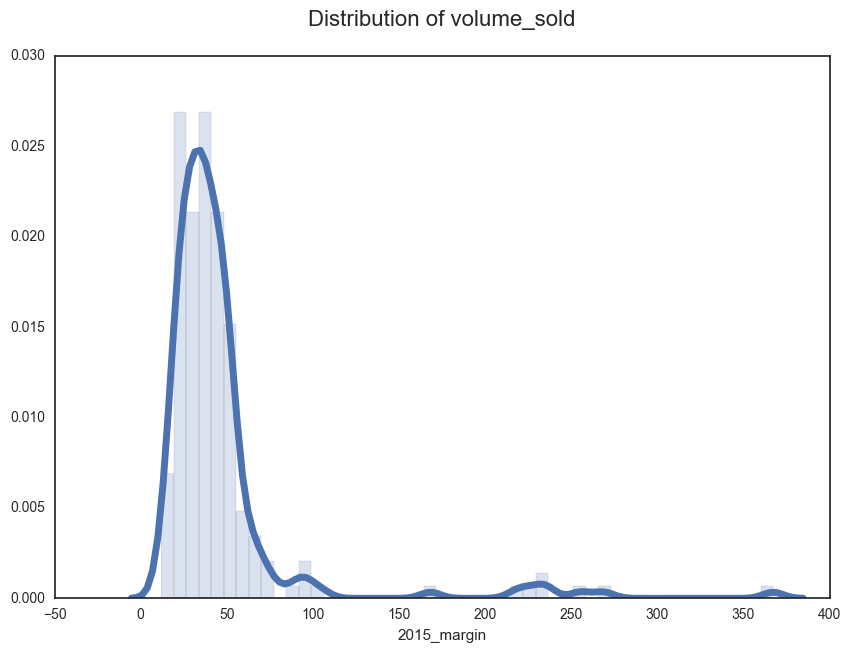

In [103]:
distribution_plotter(col[0],rows['2015_margin'])

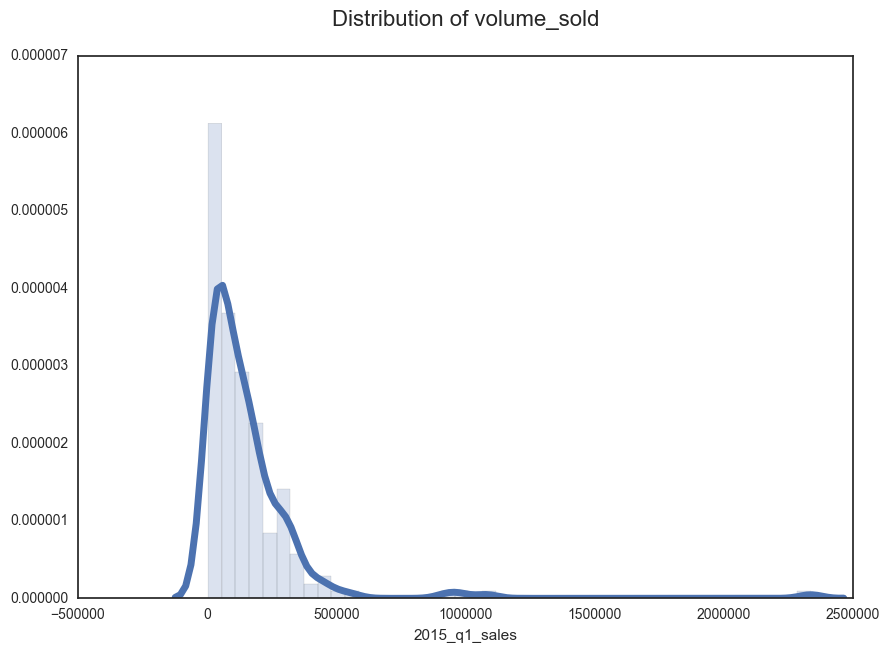

In [105]:
distribution_plotter(col[0],rows['2015_q1_sales'])

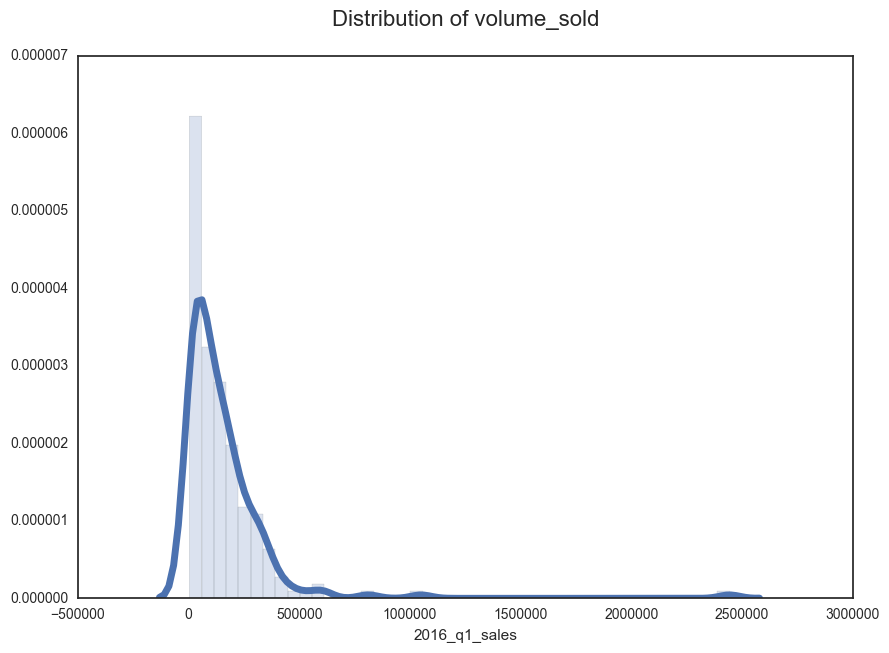

In [106]:
distribution_plotter(col[0],rows['2016_q1_sales'])